# Ring network figures
Uses the shared `clean.lib.dynamics` module to reproduce the ring plots.

In [1]:
import sys
from pathlib import Path

def _find_repo_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / 'clean').exists():
            return p
    return start

ROOT = _find_repo_root(Path(__file__).resolve()) if '__file__' in globals() else _find_repo_root(Path.cwd().resolve())
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

import os
import numpy as np
import numba
from clean.lib import dynamics as WTA
from matplotlib import pyplot as plt

FIG_DIR = Path('figures/ring')
FIG_DIR.mkdir(parents=True, exist_ok=True)
os.chdir(FIG_DIR)


In [2]:
@numba.njit
def simulation_Luka(num_neuron,Num_sample,dt,x0,input,syn_topos,shifts,syn_taus,alphas,neuron_types,noise=0.0, current=-1.0, modulation=None): 
    outputs = np.empty((Num_sample + 1, num_neuron, 3+syn_topos.shape[0]))
    outputs[0] = x0[:]
    x=x0[:]
    if modulation is not None:
        u_modulation=modulation
    else:
        u_modulation=np.zeros(x.shape[0])
    for i in range(Num_sample): 

        if 3000<i<3500:
            u=np.zeros((num_neuron))
            u[0]=3.0

        # elif 184500<i<186500:
        #     u=np.zeros((num_neuron))
        #     u[5]=30.0
        else:
            u=np.ones((num_neuron))*0.0
          

        dx=WTA.ss_Luka_topology_multi_syn_multi_neuron(num_neuron, x,input+u, syn_topos,shifts,syn_taus,alphas,neuron_types,noise=noise, current=current, modulation=u_modulation)

        x=x+dx*dt 

        outputs[i+1]=x 
        
    return outputs

@numba.njit
def simulation_Luka_fre(num_neuron,Num_sample,dt,x0,input,syn_topos,shifts,syn_taus,alphas,neuron_types,noise=0.0, current=-1.0, modulation=None): 
    outputs = np.empty((Num_sample + 1, num_neuron, 3+syn_topos.shape[0]))
    inputs = np.empty((Num_sample + 1, num_neuron, 1))
    outputs[0] = x0[:]
    inputs[0,:,0] = current+input
    x=x0[:]
    if modulation is not None:
        u_modulation=modulation
    else:
        u_modulation=np.zeros(x.shape[0])
    for i in range(Num_sample): 

        if 50/dt<i<70/dt:
            u=np.zeros((num_neuron))
            u[0]=3.0

        elif 1200/dt<i:
            u=np.ones((num_neuron))*1.3

        else:
            u=np.ones((num_neuron))*0.0
          

        dx=WTA.ss_Luka_topology_multi_syn_multi_neuron(num_neuron, x,input+u, syn_topos,shifts,syn_taus,alphas,neuron_types,noise=noise, current=current, modulation=u_modulation)

        x=x+dx*dt 

        outputs[i+1]=x 
        inputs[i+1,:,0]=current+input+u

    return outputs,inputs

@numba.njit
def simulation_Luka_phase(num_neuron,Num_sample,dt,x0,input,syn_topos,shifts,syn_taus,alphas,neuron_types,noise=0.0, current=-1.0, modulation=None): 
    outputs = np.empty((Num_sample + 1, num_neuron, 3+syn_topos.shape[0]))
    inputs = np.empty((Num_sample + 1, num_neuron, 1))
    outputs[0] = x0[:]
    inputs[0,:,0] = current+input
    x=x0[:]
    if modulation is not None:
        u_modulation=modulation
    else:
        u_modulation=np.zeros(x.shape[0])
    for i in range(Num_sample): 

        if 50/dt<i<70/dt:
            u=np.zeros((num_neuron))
            u[0]=3.0

        elif 600/dt<i<620/dt:
            u=np.zeros((num_neuron))
            u[1]=2.0
        elif 1200/dt<i<1220/dt:
            u=np.zeros((num_neuron))
            u[1]=2.0
        else:
            u=np.ones((num_neuron))*0.0
          

        dx=WTA.ss_Luka_topology_multi_syn_multi_neuron(num_neuron, x,input+u, syn_topos,shifts,syn_taus,alphas,neuron_types,noise=noise, current=current, modulation=u_modulation)

        x=x+dx*dt 

        outputs[i+1]=x 
        inputs[i+1,:,0]=current+input+u
        
    return outputs, inputs

@numba.njit
def simulation_Luka_switch(num_neuron,Num_sample,dt,x0,input,syn_topos,shifts,syn_taus,alphas,neuron_types,noise=0.0, current=-1.0, modulation=None): 
    outputs = np.empty((Num_sample + 1, num_neuron, 3+syn_topos.shape[0]))
    inputs = np.empty((Num_sample + 1, num_neuron, 1))
    outputs[0] = x0[:]
    inputs[0,:,0] = current+input
    x=x0[:]
    if modulation is not None:
        u_modulation=modulation
    else:
        u_modulation=np.zeros(x.shape[0])
    for i in range(Num_sample): 

        if 50/dt<i<70/dt:
            u=np.zeros((num_neuron))
            u[0]=3.0

        # elif 600/dt<i<620/dt:
        #     u=np.zeros((num_neuron))
        #     u[1]=2.0
        elif 1200/dt<i<1220/dt:
            u=np.zeros((num_neuron))
            u[4]=2.0
        else:
            u=np.ones((num_neuron))*0.0
          

        dx=WTA.ss_Luka_topology_multi_syn_multi_neuron(num_neuron, x,input+u, syn_topos,shifts,syn_taus,alphas,neuron_types,noise=noise, current=current, modulation=u_modulation)

        x=x+dx*dt 

        outputs[i+1]=x 
        inputs[i+1,:,0]=current+input+u
        
    return outputs, inputs



In [3]:
num_syn_types,num_neuron = 4,5

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-3,-3])
syn_taus_=np.array([0.5,20,300,50])
syn_alphas_=np.array([10,10,10,10])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix,_=WTA.ring_topology_gen(5,0.0,2)

_,excitation_matrix[:5,:5]=WTA.ring_topology_gen(5,0.5,0.0)
# _,excitation_matrix[5:10,5:10]=WTA.ring_topology_gen(5,2,0.0)


print("Excitation matrix", excitation_matrix)


syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix
# syn_matrixs[2,:,:]=-inhibition_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix
neuron_types[0,:]=1.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]]


In [4]:
dt=0.05
Num_sample=int(20000/dt)
u=np.zeros(5)
outputs_HCO=simulation_Luka(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


/tmp/ipykernel_21220/1287740803.py:23: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dx=WTA.ss_Luka_topology_multi_syn_multi_neuron(num_neuron, x,input+u, syn_topos,shifts,syn_taus,alphas,neuron_types,noise=noise, current=current, modulation=u_modulation)


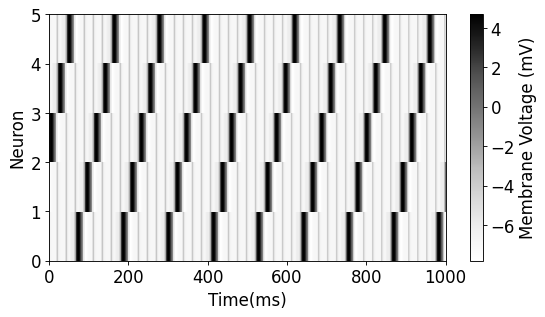

In [5]:
from matplotlib.pyplot import figure

data= np.flip(np.array(outputs_HCO)[20000:40000,:,0],1)
caption_size = 15
title_size   = 20
axis_size    = 15

figure(figsize=(8, 4), dpi=80)

# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='Greys',extent=[0, data.shape[0] * dt, 0, data.shape[1]])
cbar = plt.colorbar()

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)
plt.tick_params(axis='both',labelsize=axis_size)

plt.xlabel('Time(ms)',fontsize=caption_size)
plt.ylabel('Neuron',fontsize=caption_size)
plt.savefig('ring.png', bbox_inches='tight')



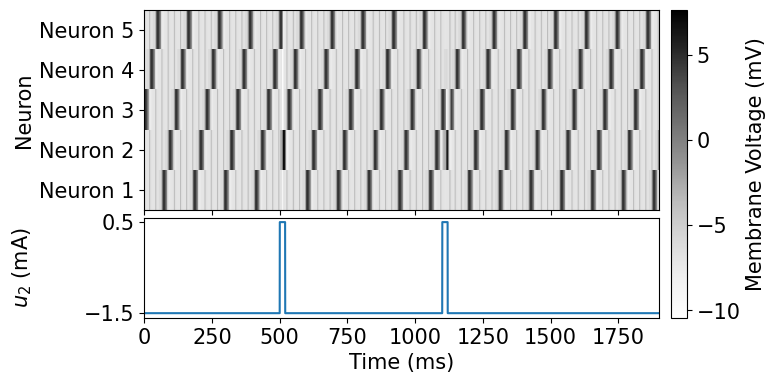

In [6]:
dt=0.05
Num_sample=int(2000/dt)
u=np.zeros(5)
outputs,inputs=simulation_Luka_phase(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


start=int(100/dt)
end=int(2000/dt)
data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 15
axis_size    = 15
# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.


fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(8, 4),
        sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios': [2, 1]}
)

# ─── raster ────────────────────────────────────────────────
im = ax1.imshow(
        data.T,
        aspect='auto', cmap='Greys',
        interpolation='nearest',
        extent=[0, (data.shape[0]-1)*dt, 0, data.shape[1]]
)
ax1.set_yticks(np.arange(0.5, data.shape[1], 1))
ax1.set_yticklabels(['Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5'])
ax1.set_ylabel('Neuron',fontsize=caption_size)
ax1.tick_params(axis='both',labelsize=axis_size)
#ax1.set_title('Voltage Raster Plot\nof Neurons in an Ring Oscillator', pad=10,fontsize=caption_size)

# ─── time-series ───────────────────────────────────────────
input_plot=inputs[start:end, 1, 0]
time = np.arange(data.shape[0]) * dt
ticks = np.linspace(min(input_plot),max(input_plot),2)
ax2.set_yticks(ticks)
ax2.plot(time, inputs[start:end, 1, 0])
ax2.set_xlabel('Time (ms)',fontsize=caption_size)
ax2.set_ylabel('$u_2$ (mA)',fontsize=caption_size)
ax2.tick_params(axis='both',labelsize=axis_size)

# ─── ➜  key line  ◀︎────────────────────────────────────────
cbar = fig.colorbar(im, ax=[ax1, ax2], pad=0.02)

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)

fig.align_ylabels((ax1, ax2))
plt.show()
fig.savefig('phase_switching.png', dpi=fig.dpi,bbox_inches='tight')



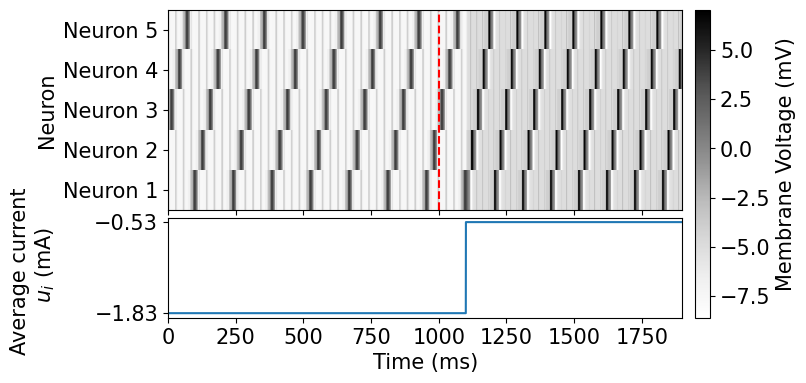

In [7]:
dt=0.05
Num_sample=int(2000/dt)
u=np.zeros(5)
outputs,inputs=simulation_Luka_fre(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.83)


start=int(100/dt)
end=int(2000/dt)
data= np.flip(np.array(outputs)[start:end,:,0],1)

caption_size = 15
title_size   = 15
axis_size    = 15
# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.


fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(8,4),
        sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios': [2, 1]}
)

# ─── raster ────────────────────────────────────────────────
im = ax1.imshow(
        data.T,
        aspect='auto', cmap='Greys',
        interpolation='nearest',
        extent=[0, (data.shape[0]-1)*dt, 0, data.shape[1]]
)
ax1.axvline(x=1000, color='r', linestyle='--')
ax1.set_yticks(np.arange(0.5, data.shape[1], 1))
ax1.set_yticklabels(['Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5'])
ax1.set_ylabel('Neuron',fontsize=caption_size)
#ax1.set_title('Voltage Raster Plot\nof Neurons in an Ring Oscillator', pad=10,fontsize=caption_size)
ax1.tick_params(axis='both',labelsize=axis_size)
# ─── time-series ───────────────────────────────────────────
input_plot=inputs[start:end, 3, 0]
time = np.arange(data.shape[0]) * dt
ax2.plot(time, inputs[start:end, 3, 0])
ticks = np.linspace(min(input_plot),max(input_plot),2)
ax2.set_yticks(ticks)
ax2.set_xlabel('Time (ms)',fontsize=caption_size)
ax2.set_ylabel('Average current \n $u_i$ (mA)',fontsize=caption_size)
ax2.tick_params(axis='both',labelsize=axis_size)
# ─── ➜  key line  ◀︎────────────────────────────────────────

cbar = fig.colorbar(im, ax=[ax1, ax2], pad=0.02)

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)

fig.align_ylabels((ax1, ax2))
plt.show()    
fig.savefig('fre_switching.png', dpi=fig.dpi,bbox_inches='tight')




In [8]:
num_syn_types,num_neuron = 4,5

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-2.5,-2.5])
syn_taus_=np.array([0.5,20,20,200])
syn_alphas_=np.array([50,50,50,50])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix,_=WTA.ring_topology_gen(5,0.0,2)

_,excitation_matrix[:5,:5]=WTA.ring_topology_gen(5,0.5,0.0)

# syn_matrixs[3,:,4]=excitation_matrix[:,4]
# syn_matrixs[2,4,0:3]=-inhibition_matrix[4,0:3]
# excitation_matrix[:,4]=0


print("Excitation matrix", excitation_matrix)
syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix


neuron_types[0,:]=1.0
neuron_types[2,4]=1.0
neuron_types[0,4]=0.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]]


In [9]:
dt=0.05
Num_sample=int(20000/dt)
u=np.zeros(5)
modulation=np.zeros(5)
modulation[4]=0.2
outputs_HCO=simulation_Luka(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5,modulation=modulation)



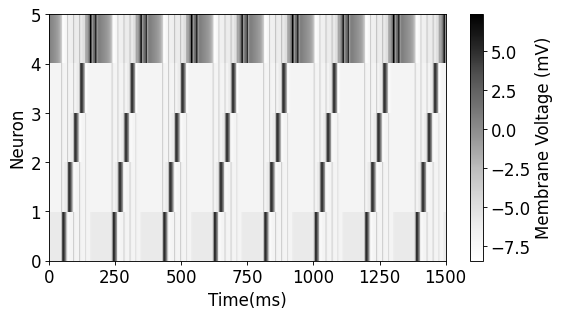

In [10]:
from matplotlib.pyplot import figure

data= np.flip(np.array(outputs_HCO)[10000:40000,:,0],1)
caption_size = 15
title_size   = 20
axis_size    = 15
# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.
figure(figsize=(8, 4), dpi=80)
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='Greys',extent=[0, data.shape[0] * dt, 0, data.shape[1]])
cbar = plt.colorbar()

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)
plt.tick_params(axis='both',labelsize=axis_size)

plt.xlabel('Time(ms)',fontsize=caption_size)
plt.ylabel('Neuron',fontsize=caption_size)
plt.savefig('he_ring.png', bbox_inches='tight')



In [11]:
num_syn_types,num_neuron = 4,5

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-2.5,-2.5])
syn_taus_=np.array([0.5,20,20,200])
syn_alphas_=np.array([50,50,50,50])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix,_=WTA.ring_topology_gen(5,0.0,2)

_,excitation_matrix[:2,:2]=WTA.ring_topology_gen(2,0.5,0.0)
_,excitation_matrix[2:5,2:5]=WTA.ring_topology_gen(3,0.5,0.0)


print("Excitation matrix", excitation_matrix)


syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix
# syn_matrixs[2,:,:]=-inhibition_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix
neuron_types[0,:]=1.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.  0.5 0.  0.  0. ]
 [0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]]


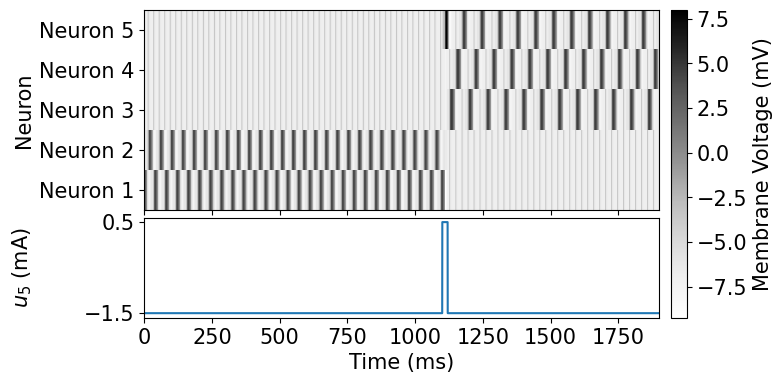

In [12]:
dt=0.05
Num_sample=int(2000/dt)
u=np.zeros(5)
outputs,inputs=simulation_Luka_switch(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


start=int(100/dt)
end=int(2000/dt)
data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 15
axis_size    = 15
# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.


fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(8,4),
        sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios': [2, 1]}
)

# ─── raster ────────────────────────────────────────────────
im = ax1.imshow(
        data.T,
        aspect='auto', cmap='Greys',
        interpolation='nearest',
        extent=[0, (data.shape[0]-1)*dt, 0, data.shape[1]]
)
ax1.set_yticks(np.arange(0.5, data.shape[1], 1))
ax1.set_yticklabels(['Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5'])
ax1.set_ylabel('Neuron',fontsize=caption_size)
ax1.tick_params(axis='both',labelsize=axis_size)
#ax1.set_title('Voltage Raster Plot\nof Neurons in an Ring Oscillator', pad=10,fontsize=caption_size)

# ─── time-series ───────────────────────────────────────────
input_plot=inputs[start:end, 4, 0]
time = np.arange(data.shape[0]) * dt
ticks = np.linspace(min(input_plot),max(input_plot),2)
ax2.set_yticks(ticks)
ax2.plot(time, inputs[start:end, 4, 0])
ax2.set_xlabel('Time (ms)',fontsize=caption_size)
ax2.set_ylabel('$u_5$ (mA)',fontsize=caption_size)
ax2.tick_params(axis='both',labelsize=axis_size)

# ─── ➜  key line  ◀︎────────────────────────────────────────
cbar = fig.colorbar(im, ax=[ax1, ax2], pad=0.02)

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)

fig.align_ylabels((ax1, ax2))
plt.show()
fig.savefig('pattern_switching.png', dpi=fig.dpi,bbox_inches='tight')



In [13]:
num_syn_types,num_neuron = 4,4

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-2.5,-3])
syn_taus_=np.array([0.5,20,20,200])
syn_alphas_=np.array([50,50,50,50])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix,_=WTA.ring_topology_gen(4,0.0,2)

_,excitation_matrix[:2,:2]=WTA.ring_topology_gen(2,0.75,0.0)
_,excitation_matrix[2:4,2:4]=WTA.ring_topology_gen(2,0.75,0.0)
# _,excitation_matrix[5:10,5:10]=WTA.ring_topology_gen(5,2,0.0)


print("Excitation matrix", excitation_matrix)


syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix
# syn_matrixs[2,:,:]=-inhibition_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix

syn_matrixs[3,0,1]=-2
syn_matrixs[3,1,0]=-2

syn_matrixs[3,2,3]=-2
syn_matrixs[3,3,2]=-2

neuron_types[0,:]=1.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.   0.75 0.   0.  ]
 [0.75 0.   0.   0.  ]
 [0.   0.   0.   0.75]
 [0.   0.   0.75 0.  ]]


In [14]:
@numba.njit
def simulation_Luka_two_network(num_neuron,Num_sample,dt,x0,input,syn_topos,shifts,syn_taus,alphas,neuron_types,noise=0.0, current=-1.0, modulation=None): 
    outputs = np.empty((Num_sample + 1, num_neuron, 3+syn_topos.shape[0]))
    inputs = np.empty((Num_sample + 1, num_neuron, 1))
    outputs[0] = x0[:]
    inputs[0,:,0] = current+input
    x=x0[:]
    if modulation is not None:
        u_modulation=modulation
    else:
        u_modulation=np.zeros(x.shape[0])
    for i in range(Num_sample): 

        if 50/dt<i<80/dt:
            u=np.zeros((num_neuron))
            u[0]=3.0
        else:
            u=np.ones((num_neuron))*0.0

        # # elif 600/dt<i<620/dt:
        # #     u=np.zeros((num_neuron))
        # #     u[1]=2.0
        # elif 1200/dt<i<1220/dt:
        #     u=np.zeros((num_neuron))
        #     u[4]=2.0
        # else:
        #     u=np.ones((num_neuron))*0.0
          

        dx=WTA.ss_Luka_topology_multi_syn_multi_neuron(num_neuron, x,input+u, syn_topos,shifts,syn_taus,alphas,neuron_types,noise=noise, current=current, modulation=u_modulation)

        x=x+dx*dt 

        outputs[i+1]=x 
        inputs[i+1,:,0]=current+input+u
        
    return outputs, inputs



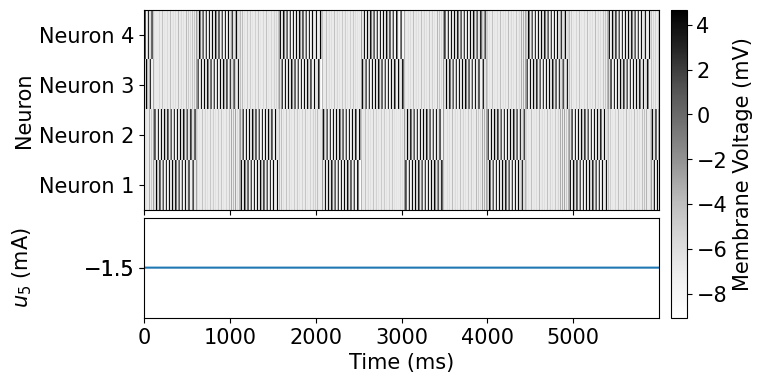

<Figure size 640x480 with 0 Axes>

In [15]:
dt=0.05
Num_sample=int(7000/dt)
u=np.zeros(4)
outputs,inputs=simulation_Luka_two_network(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


start=int(1000/dt)
end=int(7000/dt)
data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 15
axis_size    = 15
# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.


fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(8,4),
        sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios': [2, 1]}
)

# ─── raster ────────────────────────────────────────────────
im = ax1.imshow(
        data.T,
        aspect='auto', cmap='Greys',
        interpolation='nearest',
        extent=[0, (data.shape[0]-1)*dt, 0, data.shape[1]]
)
ax1.set_yticks(np.arange(0.5, data.shape[1], 1))
ax1.set_yticklabels(['Neuron 1','Neuron 2','Neuron 3','Neuron 4'])
ax1.set_ylabel('Neuron',fontsize=caption_size)
ax1.tick_params(axis='both',labelsize=axis_size)
#ax1.set_title('Voltage Raster Plot\nof Neurons in an Ring Oscillator', pad=10,fontsize=caption_size)

# ─── time-series ───────────────────────────────────────────
input_plot=inputs[start:end, 0, 0]
time = np.arange(data.shape[0]) * dt
ticks = np.linspace(min(input_plot),max(input_plot),2)
ax2.set_yticks(ticks)
ax2.plot(time, inputs[start:end, 0, 0])
ax2.set_xlabel('Time (ms)',fontsize=caption_size)
ax2.set_ylabel('$u_5$ (mA)',fontsize=caption_size)
ax2.tick_params(axis='both',labelsize=axis_size)

# ─── ➜  key line  ◀︎────────────────────────────────────────
cbar = fig.colorbar(im, ax=[ax1, ax2], pad=0.02)

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)

fig.align_ylabels((ax1, ax2))
plt.show()
plt.savefig('HCO_network.png')



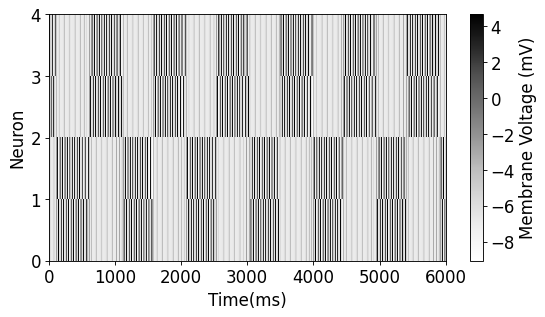

In [16]:
from matplotlib.pyplot import figure

data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 20
axis_size    = 15

figure(figsize=(8, 4), dpi=80)

# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='Greys',extent=[0, data.shape[0] * dt, 0, data.shape[1]])
cbar = plt.colorbar()

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)
plt.tick_params(axis='both',labelsize=axis_size)

plt.xlabel('Time(ms)',fontsize=caption_size)
plt.ylabel('Neuron',fontsize=caption_size)
plt.savefig('HCO_network.png', bbox_inches='tight')



In [17]:
num_syn_types,num_neuron = 4,6

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-2.5,-3])
syn_taus_=np.array([0.5,20,20,200])
syn_alphas_=np.array([50,50,50,50])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix,_=WTA.ring_topology_gen(6,0.0,2)

_,excitation_matrix[:2,:2]=WTA.ring_topology_gen(2,0.75,0.0)
_,excitation_matrix[2:4,2:4]=WTA.ring_topology_gen(2,0.75,0.0)
_,excitation_matrix[4:6,4:6]=WTA.ring_topology_gen(2,0.75,0.0)
# _,excitation_matrix[5:10,5:10]=WTA.ring_topology_gen(5,2,0.0)


print("Excitation matrix", excitation_matrix)


syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix
# syn_matrixs[2,:,:]=-inhibition_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix

syn_matrixs[3,0,1]=-2
syn_matrixs[3,1,0]=-2

syn_matrixs[3,2,3]=-2
syn_matrixs[3,3,2]=-2

syn_matrixs[3,4,5]=-2
syn_matrixs[3,5,4]=-2

syn_matrixs[3,2,1]=0.5
syn_matrixs[3,4,3]=0.5
syn_matrixs[3,0,5]=0.5

neuron_types[0,:]=1.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.   0.75 0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.75 0.   0.  ]
 [0.   0.   0.75 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.75]
 [0.   0.   0.   0.   0.75 0.  ]]


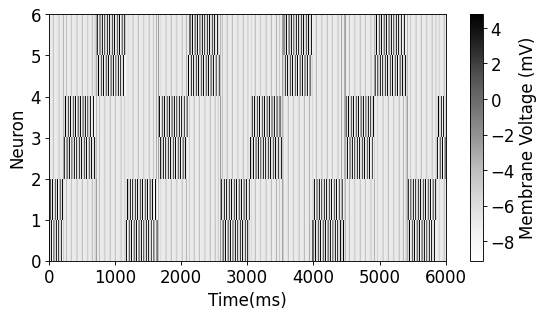

In [18]:
from matplotlib.pyplot import figure

dt=0.05
Num_sample=int(7000/dt)
u=np.zeros(6)
outputs,inputs=simulation_Luka_two_network(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


start=int(1000/dt)
end=int(7000/dt)

data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 20
axis_size    = 15

figure(figsize=(8, 4), dpi=80)

# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='Greys',extent=[0, data.shape[0] * dt, 0, data.shape[1]])
cbar = plt.colorbar()

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)
plt.tick_params(axis='both',labelsize=axis_size)

plt.xlabel('Time(ms)',fontsize=caption_size)
plt.ylabel('Neuron',fontsize=caption_size)
plt.savefig('3ring_network_3ring.png', bbox_inches='tight')



In [19]:
num_syn_types,num_neuron = 4,9

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-3,-4])
syn_taus_=np.array([0.5,20,10,200])
syn_alphas_=np.array([50,50,50,50])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix=np.zeros((num_neuron, num_neuron))
slow_inhibition_matrix=np.zeros((num_neuron, num_neuron))

inhibition_matrix[0:3,0:3],_=WTA.ring_topology_gen(3,0.0,2)
inhibition_matrix[3:6,3:6],_=WTA.ring_topology_gen(3,0.0,2)
inhibition_matrix[6:9,6:9],_=WTA.ring_topology_gen(3,0.0,2)

slow_inhibition_matrix,_=WTA.ring_topology_gen(9,0.0,2.5)

slow_inhibition_matrix[0:3,0:3]=0
slow_inhibition_matrix[3:6,3:6]=0
slow_inhibition_matrix[6:9,6:9]=0

_,excitation_matrix[0:3,0:3]=WTA.ring_topology_gen(3,0.75,0.0)
_,excitation_matrix[3:6,3:6]=WTA.ring_topology_gen(3,0.75,0.0)
_,excitation_matrix[6:9,6:9]=WTA.ring_topology_gen(3,0.75,0.0)
# _,excitation_matrix[5:10,5:10]=WTA.ring_topology_gen(5,2,0.0)

ultraslow_inhibition_matrix,_=WTA.ring_topology_gen(3,0.0,2)

print("Excitation matrix", excitation_matrix)


syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix
syn_matrixs[2,:,:]=-slow_inhibition_matrix
syn_matrixs[3,0:3,0:3]=-ultraslow_inhibition_matrix
syn_matrixs[3,3:6,3:6]=-ultraslow_inhibition_matrix
syn_matrixs[3,6:9,6:9]=-ultraslow_inhibition_matrix
# syn_matrixs[2,:,:]=-inhibition_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix

syn_matrixs[3,3,0]=0.5
syn_matrixs[3,6,3]=0.5
syn_matrixs[3,0,6]=0.5

neuron_types[0,:]=1.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.   0.   0.75 0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.75 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.75 0.   0.   0.  ]
 [0.   0.   0.   0.75 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.75 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.75]
 [0.   0.   0.   0.   0.   0.   0.75 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.75 0.  ]]


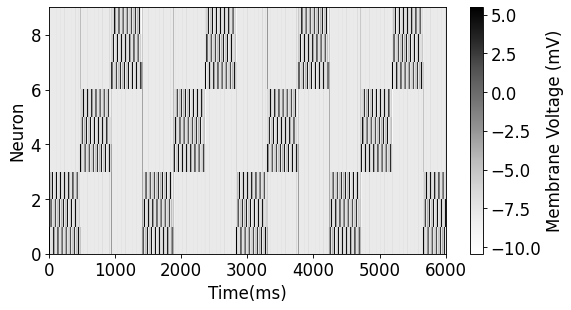

In [20]:
from matplotlib.pyplot import figure

dt=0.05
Num_sample=int(7000/dt)
u=np.zeros(9)
outputs,inputs=simulation_Luka_two_network(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


start=int(1000/dt)
end=int(7000/dt)

data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 20
axis_size    = 15

figure(figsize=(8, 4), dpi=80)

# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='Greys',extent=[0, data.shape[0] * dt, 0, data.shape[1]])
cbar = plt.colorbar()

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)
plt.tick_params(axis='both',labelsize=axis_size)

plt.xlabel('Time(ms)',fontsize=caption_size)
plt.ylabel('Neuron',fontsize=caption_size)
plt.savefig('3ring_network_3ring.png', bbox_inches='tight')



In [21]:
num_syn_types,num_neuron = 4,6

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-3,-4])
syn_taus_=np.array([0.5,20,10,200])
syn_alphas_=np.array([50,50,50,50])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix=np.zeros((num_neuron, num_neuron))
slow_inhibition_matrix=np.zeros((num_neuron, num_neuron))

inhibition_matrix[0:3,0:3],_=WTA.ring_topology_gen(3,0.0,2)
inhibition_matrix[3:6,3:6],_=WTA.ring_topology_gen(3,0.0,2)
#inhibition_matrix[6:9,6:9],_=WTA.ring_topology_gen(3,0.0,2)

slow_inhibition_matrix,_=WTA.ring_topology_gen(6,0.0,3)

slow_inhibition_matrix[0:3,0:3]=0
slow_inhibition_matrix[3:6,3:6]=0
#slow_inhibition_matrix[6:9,6:9]=0

_,excitation_matrix[0:3,0:3]=WTA.ring_topology_gen(3,0.75,0.0)
_,excitation_matrix[3:6,3:6]=WTA.ring_topology_gen(3,0.75,0.0)
#_,excitation_matrix[6:9,6:9]=WTA.ring_topology_gen(3,0.75,0.0)
# _,excitation_matrix[5:10,5:10]=WTA.ring_topology_gen(5,2,0.0)

ultraslow_inhibition_matrix,_=WTA.ring_topology_gen(3,0.0,2)

print("Excitation matrix", excitation_matrix)


syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix
syn_matrixs[2,:,:]=-slow_inhibition_matrix
syn_matrixs[3,0:3,0:3]=-ultraslow_inhibition_matrix
syn_matrixs[3,3:6,3:6]=-ultraslow_inhibition_matrix
#syn_matrixs[3,6:9,6:9]=-ultraslow_inhibition_matrix
# syn_matrixs[2,:,:]=-inhibition_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix

# syn_matrixs[3,3,0]=0.5
# syn_matrixs[3,6,3]=0.5
# syn_matrixs[3,0,6]=0.5

neuron_types[0,:]=1.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.   0.   0.75 0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.  ]
 [0.   0.75 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.75]
 [0.   0.   0.   0.75 0.   0.  ]
 [0.   0.   0.   0.   0.75 0.  ]]


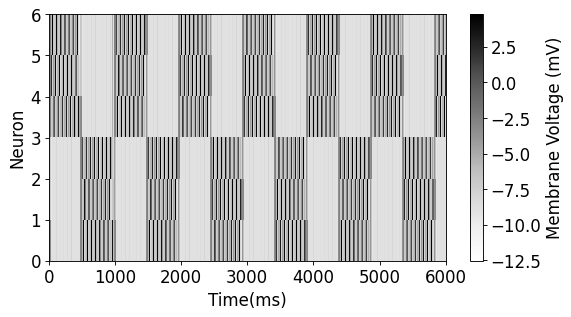

In [22]:
from matplotlib.pyplot import figure

dt=0.05
Num_sample=int(7000/dt)
u=np.zeros(6)
outputs,inputs=simulation_Luka_two_network(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


start=int(1000/dt)
end=int(7000/dt)

data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 20
axis_size    = 15

figure(figsize=(8, 4), dpi=80)

# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='Greys',extent=[0, data.shape[0] * dt, 0, data.shape[1]])
cbar = plt.colorbar()

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)
plt.tick_params(axis='both',labelsize=axis_size)

plt.xlabel('Time(ms)',fontsize=caption_size)
plt.ylabel('Neuron',fontsize=caption_size)
plt.savefig('3ring_network_HCO.png', bbox_inches='tight')



In [23]:
num_syn_types,num_neuron = 4,3

syn_matrixs=np.zeros((num_syn_types,num_neuron, num_neuron))

shifts=np.ones((num_syn_types,num_neuron))
syn_taus=np.ones((num_syn_types,num_neuron))
syn_alphas=np.ones((num_syn_types,num_neuron))


shifts_=np.array([-2.5,-2.5,-2.5,-4])
syn_taus_=np.array([0.5,20,10,200])
syn_alphas_=np.array([50,50,50,50])


neuron_types=np.zeros((3,num_neuron))
excitation_matrix=np.zeros((num_neuron,num_neuron))

inhibition_matrix=np.zeros((num_neuron, num_neuron))
slow_inhibition_matrix=np.zeros((num_neuron, num_neuron))

inhibition_matrix[0:3,0:3],_=WTA.ring_topology_gen(3,0.0,2)
# inhibition_matrix[3:6,3:6],_=WTA.ring_topology_gen(3,0.0,2)
# inhibition_matrix[6:9,6:9],_=WTA.ring_topology_gen(3,0.0,2)

# slow_inhibition_matrix,_=WTA.ring_topology_gen(9,0.0,2)

# slow_inhibition_matrix[0:3,0:3]=0
# slow_inhibition_matrix[3:6,3:6]=0
# slow_inhibition_matrix[6:9,6:9]=0

_,excitation_matrix[0:3,0:3]=WTA.ring_topology_gen(3,0.75,0.0)
# _,excitation_matrix[3:6,3:6]=WTA.ring_topology_gen(3,0.75,0.0)
# _,excitation_matrix[6:9,6:9]=WTA.ring_topology_gen(3,0.75,0.0)
# _,excitation_matrix[5:10,5:10]=WTA.ring_topology_gen(5,2,0.0)

ultraslow_inhibition_matrix,_=WTA.ring_topology_gen(3,0.0,2)

print("Excitation matrix", excitation_matrix)


syn_matrixs[0,:,:]=-inhibition_matrix
syn_matrixs[1,:,:]=excitation_matrix
#syn_matrixs[2,:,:]=-slow_inhibition_matrix
syn_matrixs[3,0:3,0:3]=-ultraslow_inhibition_matrix
# syn_matrixs[3,3:6,3:6]=-ultraslow_inhibition_matrix
# syn_matrixs[3,6:9,6:9]=-ultraslow_inhibition_matrix
# syn_matrixs[2,:,:]=-inhibition_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix*5
# syn_matrixs[3,:,:]=excitation_matrix

# syn_matrixs[3,3,0]=0.5
# syn_matrixs[3,6,3]=0.5
# syn_matrixs[3,0,6]=0.5

neuron_types[0,:]=1.0


for i in range(num_syn_types):
                shifts[i,:]=shifts[i,:]*shifts_[i]
                syn_taus[i,:]=syn_taus[i,:]*syn_taus_[i]
                syn_alphas[i,:]=syn_alphas[i,:]*syn_alphas_[i]


x0=(np.random.rand(num_neuron,3+num_syn_types)*2-1)*2



Excitation matrix [[0.   0.   0.75]
 [0.75 0.   0.  ]
 [0.   0.75 0.  ]]


In [24]:
@numba.njit
def simulation_Luka_rebound_network(num_neuron,Num_sample,dt,x0,input,syn_topos,shifts,syn_taus,alphas,neuron_types,noise=0.0, current=-1.0, modulation=None): 
    outputs = np.empty((Num_sample + 1, num_neuron, 3+syn_topos.shape[0]))
    inputs = np.empty((Num_sample + 1, num_neuron, 1))
    outputs[0] = x0[:]
    inputs[0,:,0] = current+input
    x=x0[:]
    if modulation is not None:
        u_modulation=modulation
    else:
        u_modulation=np.zeros(x.shape[0])
    for i in range(Num_sample): 

        if 1000/dt<i<1200/dt:
            u=np.zeros((num_neuron))
            u[0:3]+=-3.0
        else:
            u=np.ones((num_neuron))*0.0

        # # elif 600/dt<i<620/dt:
        # #     u=np.zeros((num_neuron))
        # #     u[1]=2.0
        # elif 1200/dt<i<1220/dt:
        #     u=np.zeros((num_neuron))
        #     u[4]=2.0
        # else:
        #     u=np.ones((num_neuron))*0.0
          

        dx=WTA.ss_Luka_topology_multi_syn_multi_neuron(num_neuron, x,input+u, syn_topos,shifts,syn_taus,alphas,neuron_types,noise=noise, current=current, modulation=u_modulation)

        x=x+dx*dt 

        outputs[i+1]=x 
        inputs[i+1,:,0]=current+input+u
        
    return outputs, inputs



Text(0, 0.5, 'Neuron')

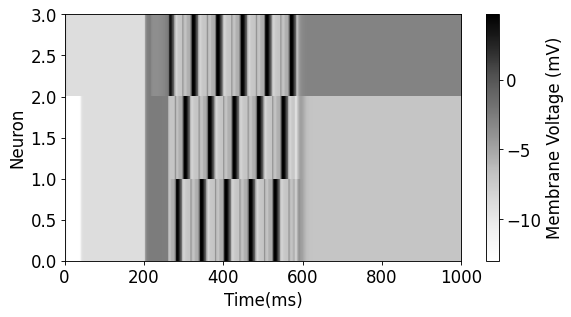

In [25]:
from matplotlib.pyplot import figure

dt=0.05
Num_sample=int(2000/dt)
u=np.zeros(3)
outputs,inputs=simulation_Luka_rebound_network(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)


start=int(1000/dt)
end=int(2000/dt)

data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 20
axis_size    = 15

figure(figsize=(8, 4), dpi=80)

# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='Greys',extent=[0, data.shape[0] * dt, 0, data.shape[1]])
cbar = plt.colorbar()

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)
plt.tick_params(axis='both',labelsize=axis_size)

plt.xlabel('Time(ms)',fontsize=caption_size)
plt.ylabel('Neuron',fontsize=caption_size)
#plt.savefig('HCO_network_3ring.png', bbox_inches='tight')



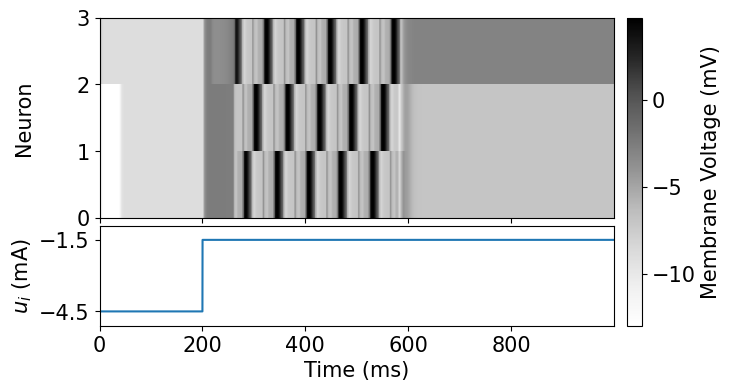

In [26]:
dt=0.05
Num_sample=int(2000/dt)
u=np.zeros(3)
outputs,inputs=simulation_Luka_rebound_network(num_neuron,Num_sample,dt,x0,u,syn_matrixs,shifts,syn_taus,syn_alphas,neuron_types,noise=0.0, current=-1.5)

def pad_ylim_and_center_label(ax, y, pad_frac=0.07):
    y = np.asarray(y)
    lo, hi = float(np.min(y)), float(np.max(y))
    rng = hi - lo if hi > lo else 1.0
    pad = pad_frac * rng
    ax.set_ylim(lo - pad, hi + pad)
    ax.set_yticks([lo, hi])                      # keep only 2 ticks     


start=int(1000/dt)
end=int(2000/dt)
data= np.flip(np.array(outputs)[start:end,:,0],1)
caption_size = 15
title_size   = 15
axis_size    = 15
# Use imshow to create a raster plot, transposing so neurons appear on the y-axis.


fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(8,4),
        sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios': [2, 1]}
)

# ─── raster ────────────────────────────────────────────────
im = ax1.imshow(
        data.T,
        aspect='auto', cmap='Greys',
        interpolation='nearest',
        extent=[0, (data.shape[0]-1)*dt, 0, data.shape[1]]
)
# ax1.set_yticks(np.arange(0.5, data.shape[1], 1))
# ax1.set_yticklabels(['Neuron 1','Neuron 2','Neuron 3'])
ax1.set_ylabel('Neuron',fontsize=caption_size)
ax1.tick_params(axis='both',labelsize=axis_size)
#ax1.set_title('Voltage Raster Plot\nof Neurons in an Ring Oscillator', pad=10,fontsize=caption_size)

# ─── time-series ───────────────────────────────────────────
input_plot=inputs[start:end, 0, 0]
time = np.arange(data.shape[0]) * dt
ticks = np.linspace(min(input_plot),max(input_plot),2)
ax2.set_yticks(ticks)
ax2.plot(time, inputs[start:end, 0, 0])
ax2.set_xlabel('Time (ms)',fontsize=caption_size)
ax2.set_ylabel('$u_i$ (mA)',fontsize=caption_size)
ax2.tick_params(axis='both',labelsize=axis_size)
pad_ylim_and_center_label(ax2, input_plot, pad_frac=0.2)

# ─── ➜  key line  ◀︎────────────────────────────────────────
cbar = fig.colorbar(im, ax=[ax1, ax2], pad=0.02)

cbar.set_label(label='Membrane Voltage (mV)',size=caption_size)
cbar.ax.tick_params(labelsize=axis_size)

fig.align_ylabels((ax1, ax2))
plt.savefig('rebound_network.png', bbox_inches='tight')

